$\textbf{PROGRAMMING ASSIGNMENT}$
---
# Support Vector Machines 
## Instructions
1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology
2. Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate.

**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

C:\Users\andyb\AppData\Local\Temp\ipykernel_11020\584457260.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  codon_usage = pd.read_csv('codon_usage.csv')


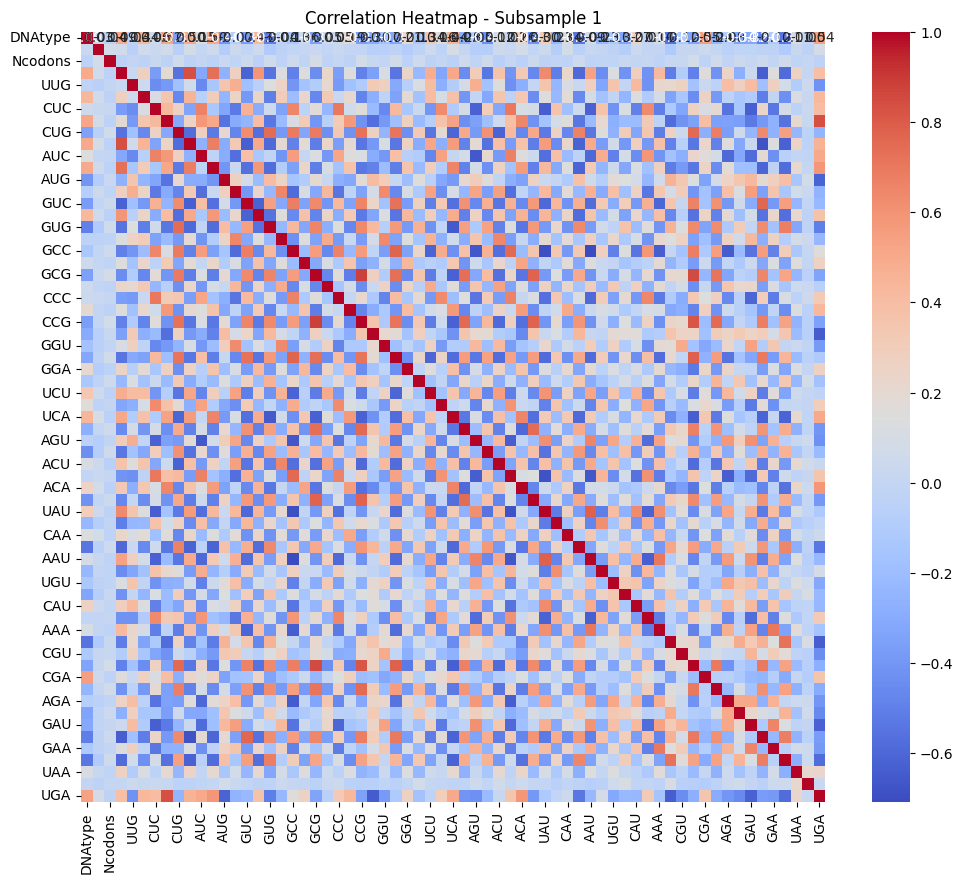

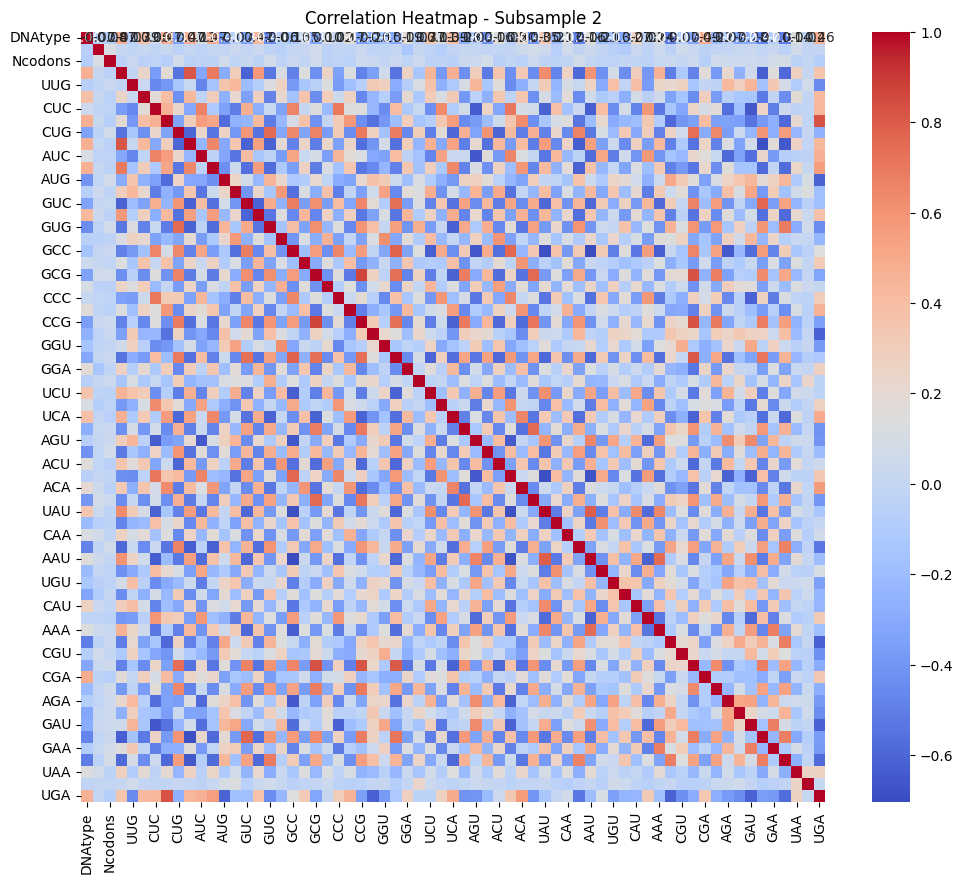

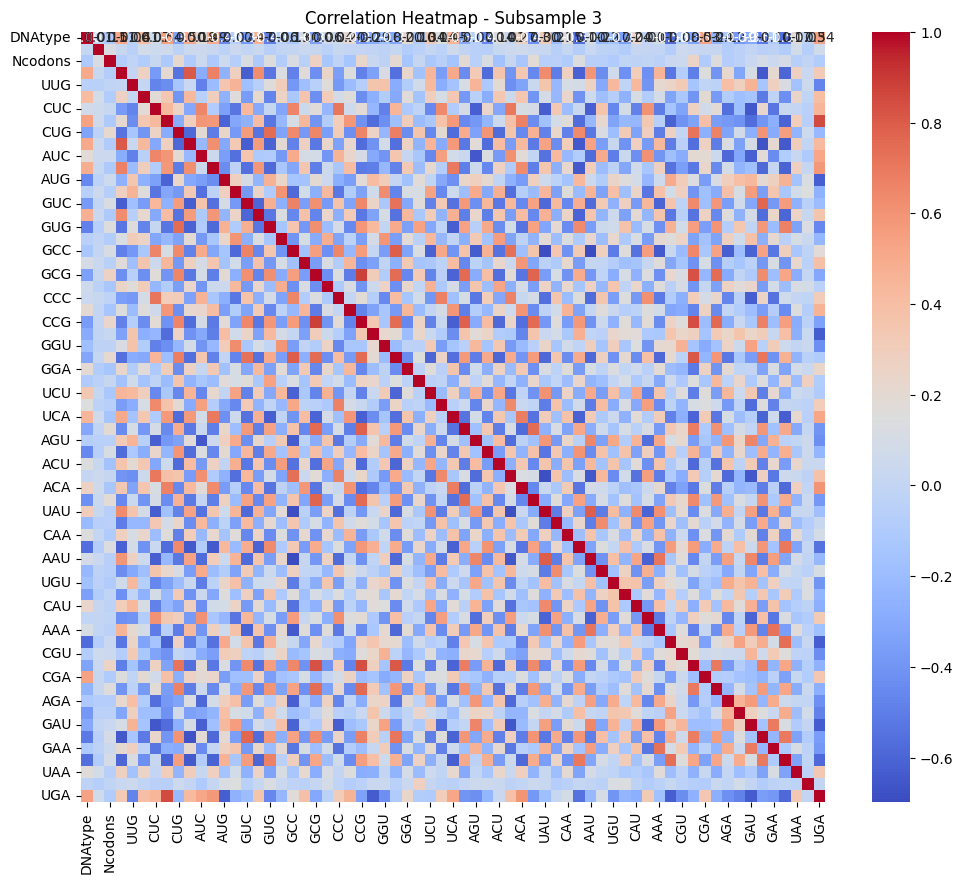

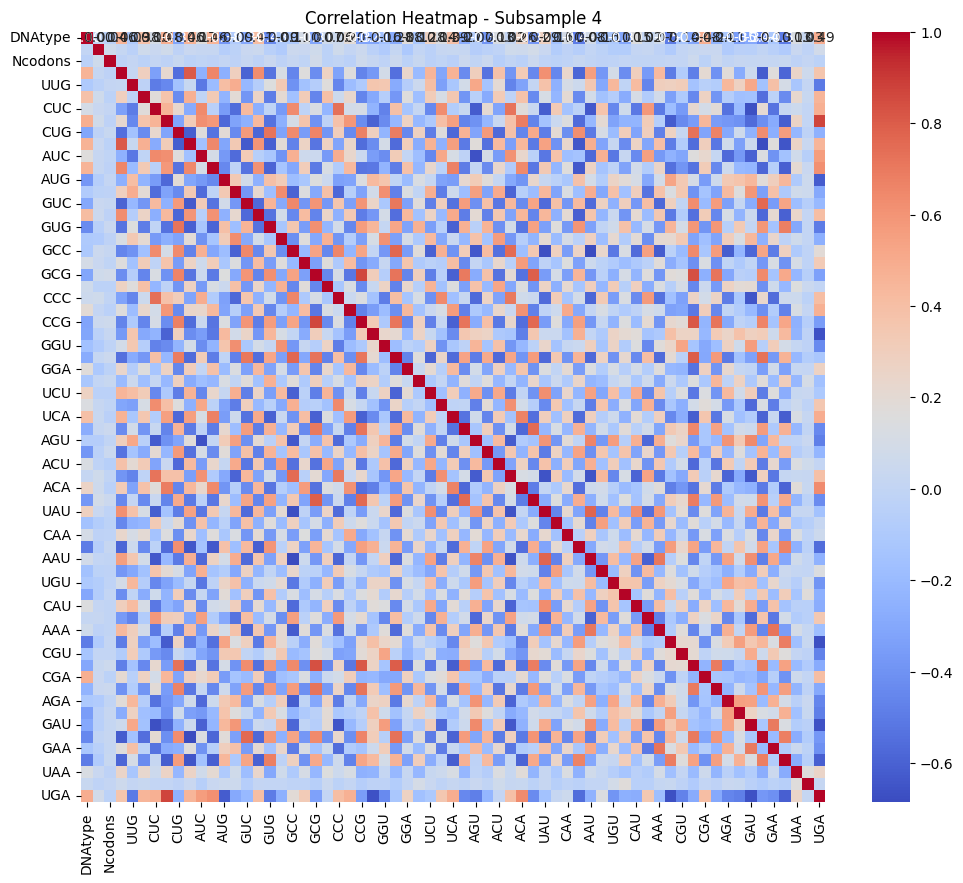

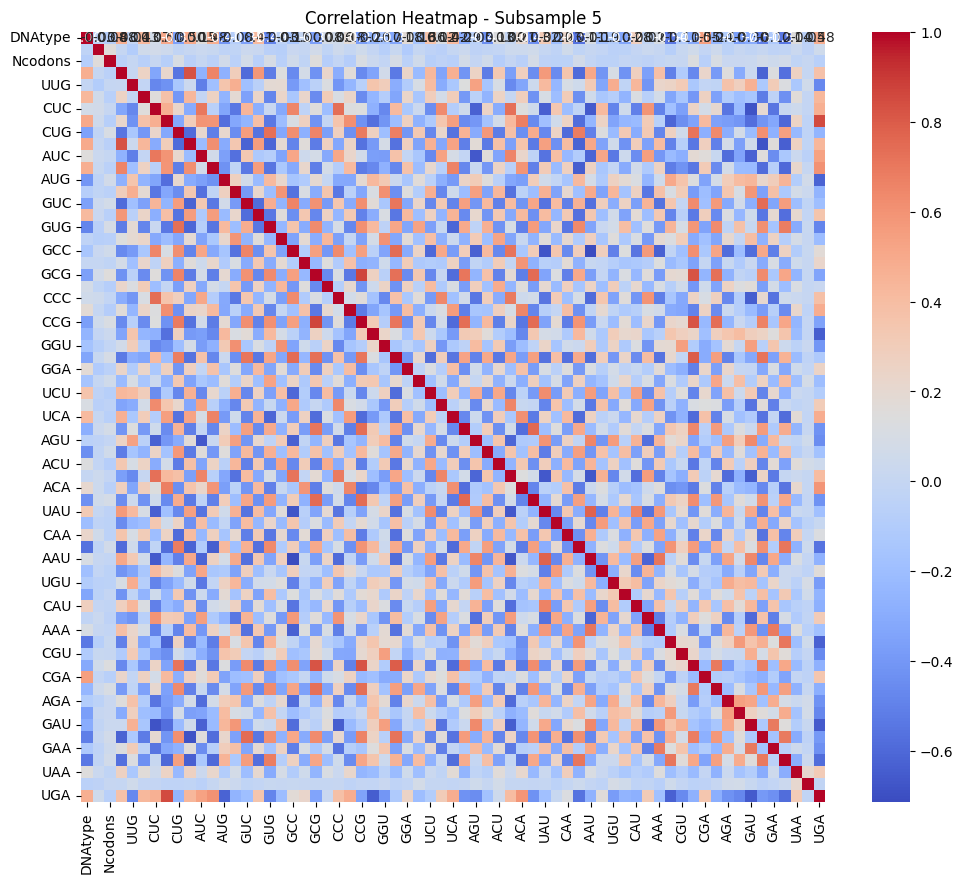

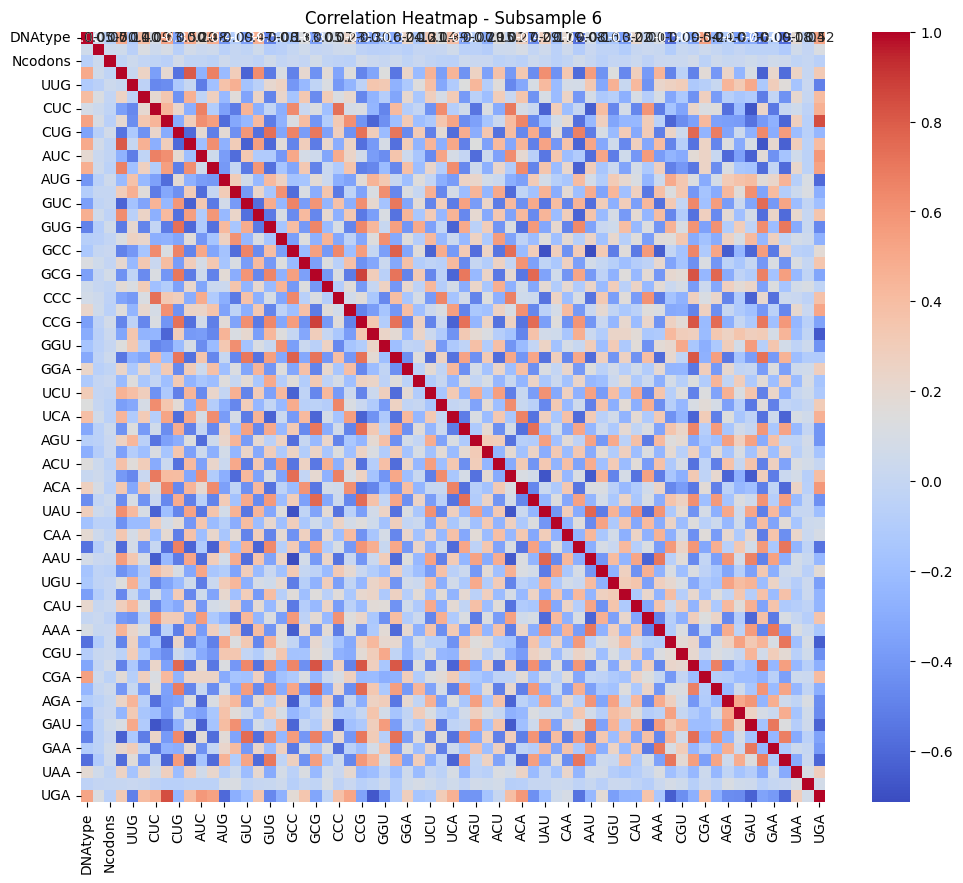

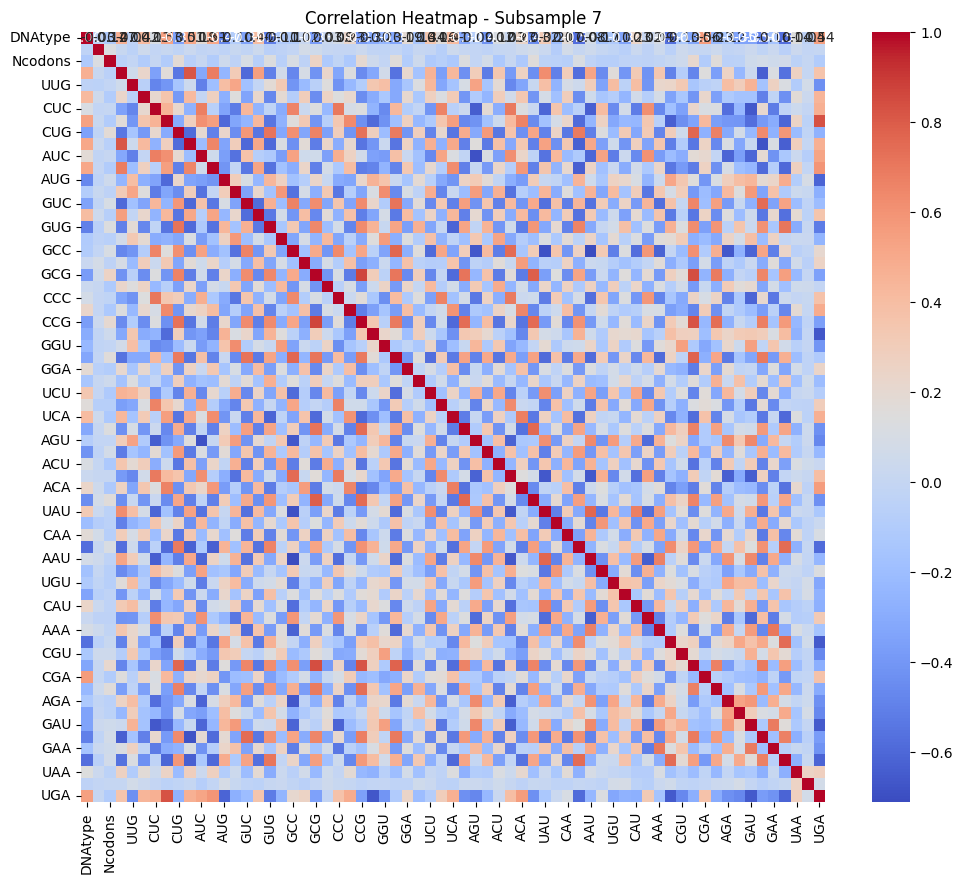

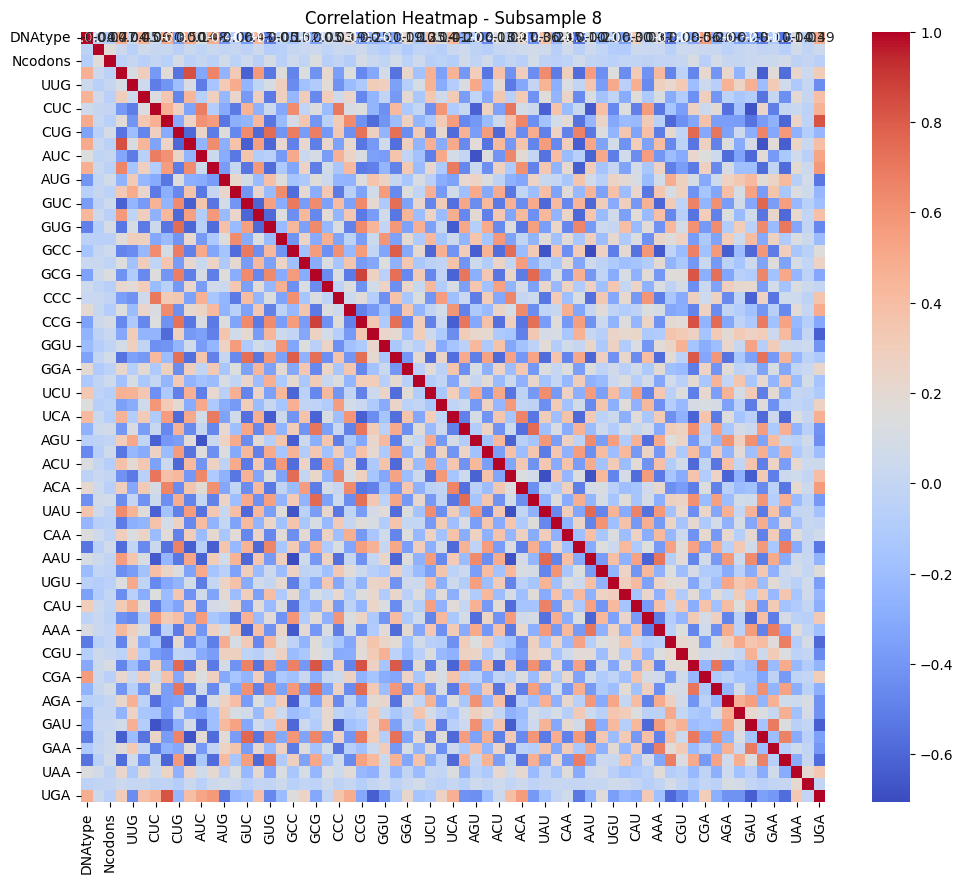

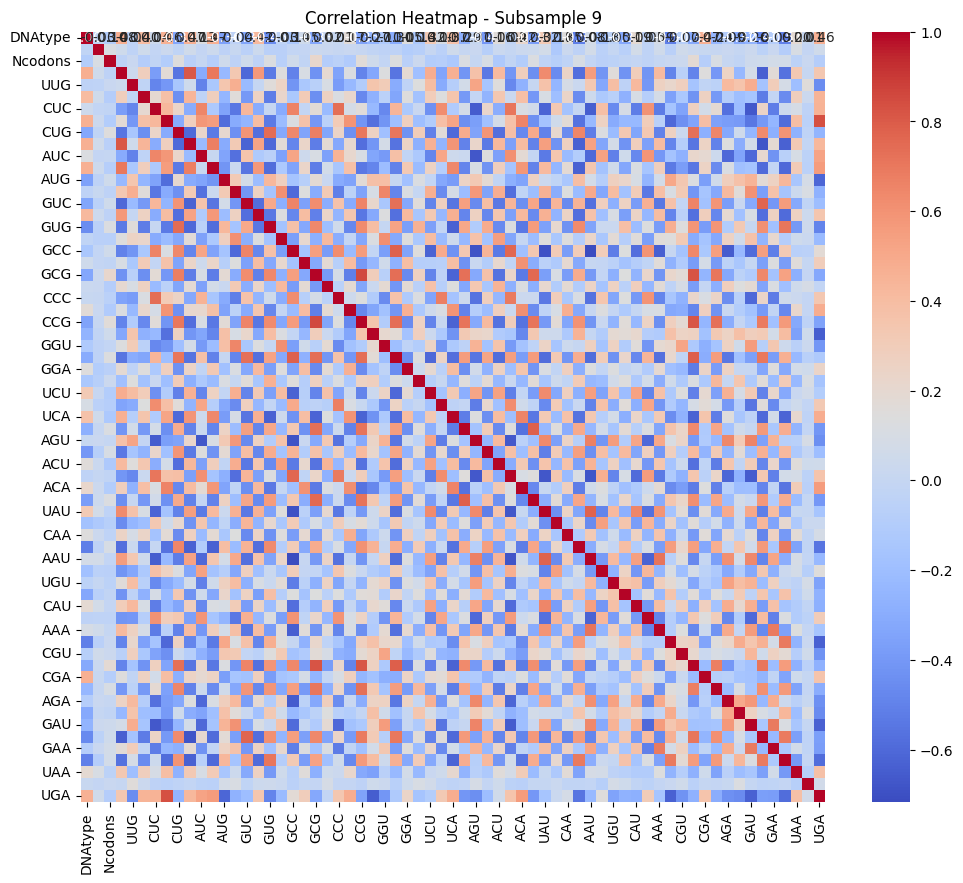

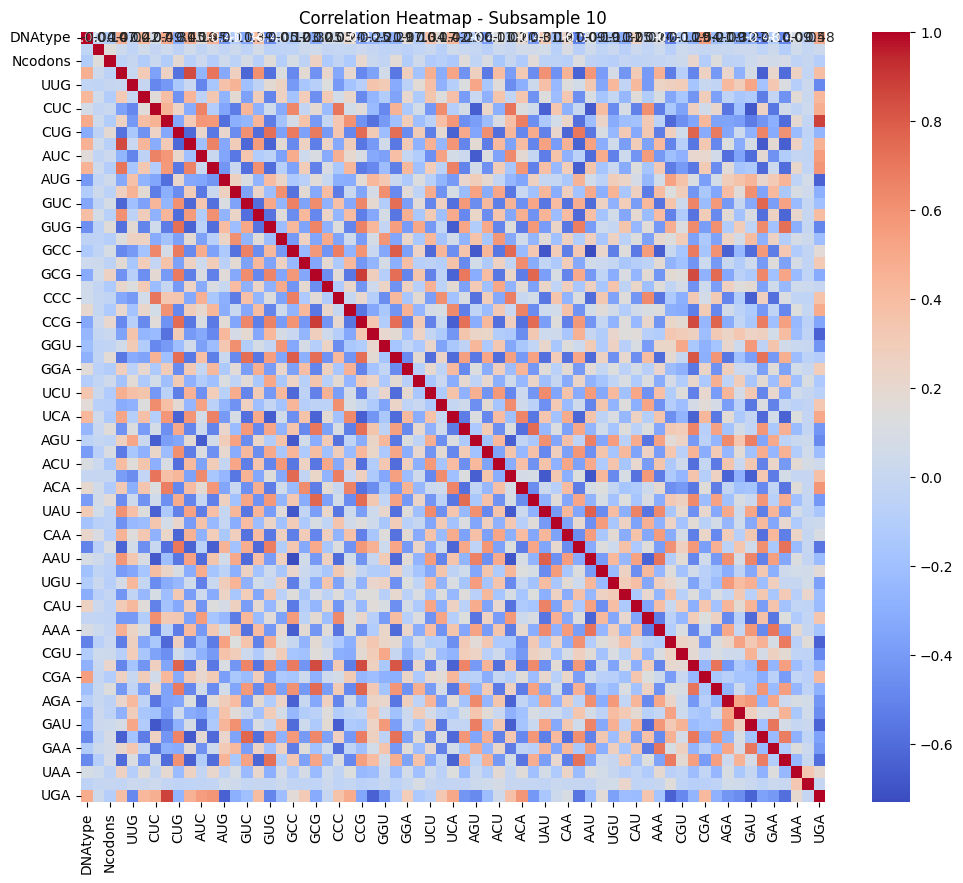

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
codon_usage = pd.read_csv('codon_usage.csv')

# Drop rows with non-numeric values
codon_usage_numeric = codon_usage.dropna().select_dtypes(include=[np.number])

# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(codon_usage_numeric) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(codon_usage_numeric.index, size=subsample_size, replace=False)
    
    # Extract the subsample from the dataset
    subsample = codon_usage_numeric.loc[subsample_indices]
    
    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()

**TASK (Classification | Applicable): If your problem is a classification problem visually check if the target variable is imbalanced**<br>
**TASK (Regression | N/A): If your problem is a regression problem visually the distribution of your target variabe**

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')


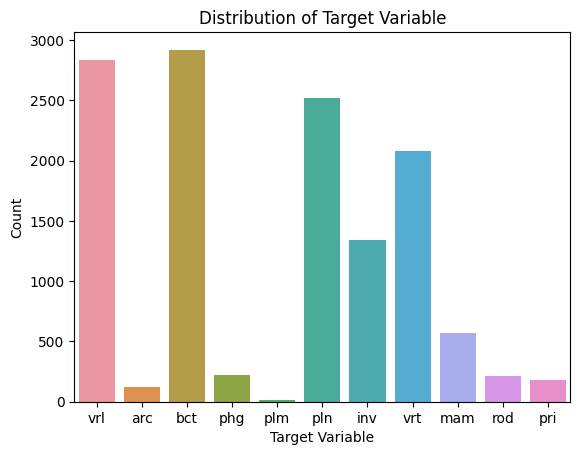

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(codon_usage.columns)

# Assuming the target variable column is named 'Kingdom'
sns.countplot(x='Kingdom', data=codon_usage)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

subsample_size = 1000  # Define the size of the subsample

# Randomly select rows for the subsample using a random generator from numpy
rng = np.random.default_rng()
subsample_indices = rng.choice(codon_usage.index, size=subsample_size, replace=False)
subsample = codon_usage.loc[subsample_indices]

# Create a pairplot
pair_plot = sns.pairplot(subsample, hue='Kingdom')
pair_plot.figure.suptitle('Pairplot of Features vs. Target - Subsample', y=1.02)
plt.show()


**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

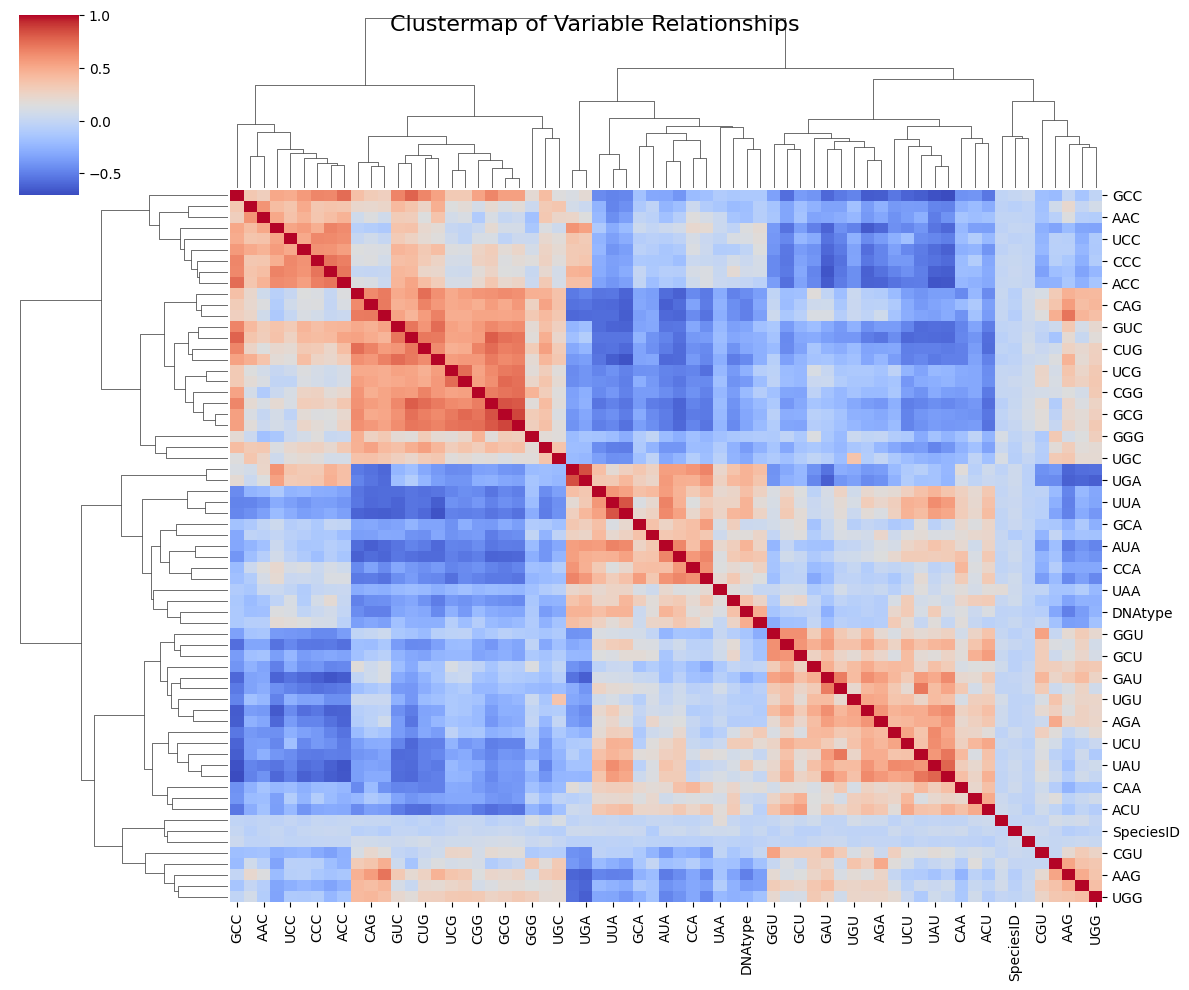

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming codon_usage is already loaded and contains the dataset
numeric_codon_usage = codon_usage.select_dtypes(include='number')

# Create the clustermap
clustermap_fig = sns.clustermap(numeric_codon_usage.corr(), cmap='coolwarm', figsize=(12, 10))
clustermap_fig.fig.suptitle('Clustermap of Variable Relationships', fontsize=16)  # Add a figure-level title
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Prepare the Data
# Assuming codon_usage_numeric is already loaded with appropriate columns
X = codon_usage_numeric.drop(columns=['DNAtype'])
y = codon_usage_numeric['DNAtype']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build a Baseline SVM Model
svm_baseline = SVC()
svm_baseline.fit(X_train, y_train)
baseline_predictions = svm_baseline.predict(X_test)

# Evaluate baseline model
print("Baseline SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, baseline_predictions))
print("Classification Report:\n", classification_report(y_test, baseline_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, baseline_predictions))

# 3. Tune Hyperparameters using GridSearch
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svm_grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)  # added cv and adjusted verbose
svm_grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", svm_grid_search.best_params_)

# 4. Evaluate Model Performance
grid_predictions = svm_grid_search.predict(X_test)

print("\nTuned SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, grid_predictions))
print("Classification Report:\n", classification_report(y_test, grid_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, grid_predictions))

Baseline SVM Model Performance:
Accuracy: 0.7198772064466615
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84      1876
           1       0.00      0.00      0.00       558
           2       0.00      0.00      0.00       164
           4       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1

    accuracy                           0.72      2606
   macro avg       0.14      0.20      0.17      2606
weighted avg       0.52      0.72      0.60      2606

Confusion Matrix:
 [[1876    0    0    0    0]
 [ 558    0    0    0    0]
 [ 164    0    0    0    0]
 [   7    0    0    0    0]
 [   1    0    0    0    0]]
Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  19.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  18.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  28.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  30.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  30.8s
